In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "data-set-for-prac2"      "practical-2-dataset-tsf"

# TSF PRACTICAL 2: MULTIPLE LINEAR REGRESSION

# Multiple linear regression -
is a statistical technique that uses several explanatory variables to predict the outcome of a response variable.Simple linear regression is a function that allows an analyst or statistician to make predictions about one variable based on the information that is known about another variable. Linear regression can only be used when one has two continuous variables—an independent variable and a dependent variable. The independent variable is the parameter that is used to calculate the dependent variable or outcome. A multiple regression model extends to several explanatory variables.

# 1] Data2 CSV CW


In [2]:
data2=read.csv("../input/practical-2-dataset-tsf/data2.csv", header=TRUE)

In [3]:
head(data2)

,X,x1,x2,x3,x4,x5,x6,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,149,66,-15,150,105,383,267
2,2,143,66,5,115,105,383,269
3,3,149,73,5,150,105,383,230
4,4,143,73,-15,115,105,383,233
5,5,149,73,-15,115,78,383,222
6,6,143,66,-15,150,78,383,267


In [4]:
#X is serial number so we exclude it
data2=data2[,-1]

In [5]:
data2

x1,x2,x3,x4,x5,x6,y
<int>,<int>,<int>,<int>,<int>,<int>,<int>
149,66,-15,150,105,383,267
143,66,5,115,105,383,269
149,73,5,150,105,383,230
143,73,-15,115,105,383,233
149,73,-15,115,78,383,222
143,66,-15,150,78,383,267
143,73,5,150,78,383,231
149,66,5,115,78,383,260
149,73,-15,150,78,196,238


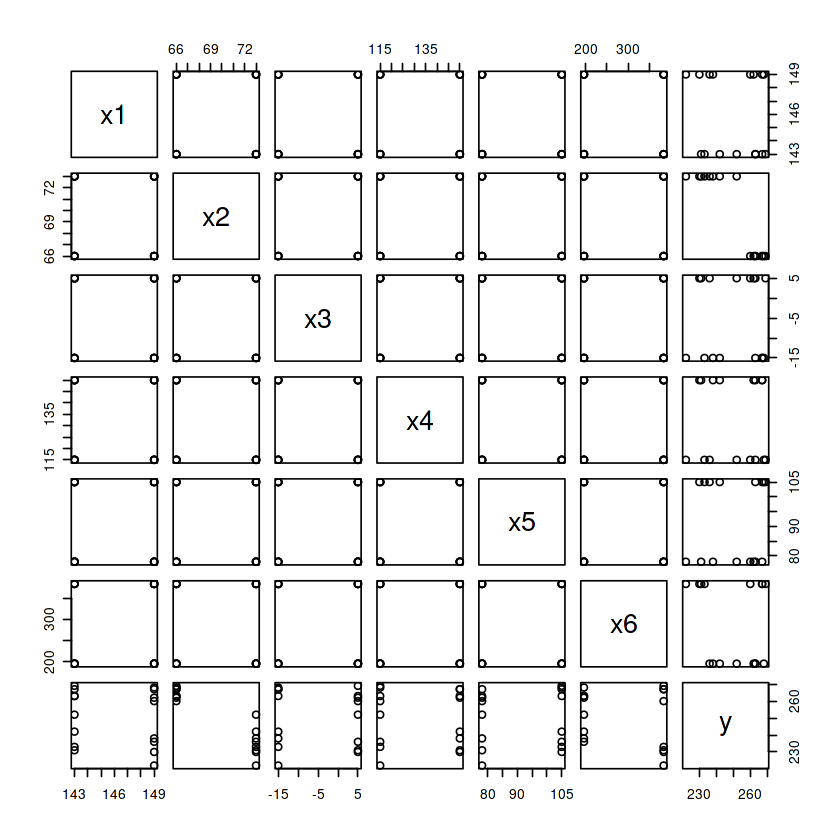

In [6]:
plot(data2)

In [7]:
model=lm(y~x1+x2+x3+x4+x5+x6, data=data2)

In [8]:
model


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data2)

Coefficients:
(Intercept)           x1           x2           x3           x4           x5  
  659.09562     -0.77083     -4.19643      0.01875     -0.01071      0.06019  
         x6  
   -0.03008  


In [9]:
S=summary(model)
S


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-7.812 -2.906 -0.250  3.250 11.812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 659.09562   90.62154   7.273 4.70e-05 ***
x1           -0.77083    0.56319  -1.369    0.204    
x2           -4.19643    0.48273  -8.693 1.13e-05 ***
x3            0.01875    0.16896   0.111    0.914    
x4           -0.01071    0.09655  -0.111    0.914    
x5            0.06019    0.12515   0.481    0.642    
x6           -0.03008    0.01807  -1.665    0.130    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.758 on 9 degrees of freedom
Multiple R-squared:  0.8994,	Adjusted R-squared:  0.8323 
F-statistic: 13.41 on 6 and 9 DF,  p-value: 0.000489


* For x1 accept H0 B1=0; p>0.05
* For x2 reject H0 B2=0;  p<0.05
* For x3 accept H0 B3=0; p>0.05
* For x4 accept H0 B4=0; p>0.05
* For x5 accept H0 B5=0; p>0.05
* For x6 accept H0 B6=0; p>0.05

In [10]:
R2=S$r.squared
R2

Adj_R2=S$adj.r.squared
Adj_R2

F=S$fstatistic
F



[1] 0.8994081

[1] 0.8323468

value    numdf    dendf 
13.41174  6.00000  9.00000

In [11]:
A1=anova(model)
A1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,85.5625,85.56250,1.87334651,2.042807e-01
x2,1,3451.5625,3451.56250,75.57016877,1.132987e-05
x3,1,0.5625,0.56250,0.01231565,9.140709e-01
x4,1,0.5625,0.56250,0.01231565,9.140709e-01
x5,1,10.5625,10.56250,0.23126045,6.420658e-01
x6,1,126.5625,126.56250,2.77102022,1.303416e-01
Residuals,9,411.0625,45.67361,NA,NA


In [12]:
SS=A1$'Sum Sq'
SS

[1]   85.5625 3451.5625    0.5625    0.5625   10.5625  126.5625  411.0625

In [13]:
SSR=sum(SS[1:6])
SSR


[1] 3675.375

In [14]:
MSR=SSR/6
MSR

[1] 612.5625

In [15]:
MSE=A1$'Mean Sq'[7]
MSE

[1] 45.67361

In [16]:
F1=MSR/MSE
F1
F=S$fstatistic
F[1]

[1] 13.41174

value 
13.41174

In [17]:
df1=F[2]
df1
df2=F[3]
df2
F_tab=qf(0.95,df1,df2)
F_tab

numdf 
    6

dendf 
    9

[1] 3.373754

In [18]:
CI=confint(model,level=0.99)
CI

,0.5 %,99.5 %
(Intercept),364.59050858,953.60073686
x1,-2.60109344,1.05942677
x2,-5.76522295,-2.62763420
x3,-0.53032803,0.56782803
x4,-0.32447316,0.30304459
x5,-0.34653928,0.46690965
x6,-0.08880514,0.02864471


In [19]:
CI[3,]
CI["x1",]

0.5 %    99.5 % 
-5.765223 -2.627634

0.5 %    99.5 % 
-2.601093  1.059427

Prediction Codes

In [20]:
data_test=read.csv("../input/practical-2-dataset-tsf/test1.csv")
data_test

X,x1,x2,x3,x4,x5,x6
<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,146,72,5,125,83,333
2,147,69,-8,130,83,350
3,147,71,-4,145,97,301
4,148,68,-5,128,83,237


In [21]:
predict(model,interval="confidence",level=0.90,newdata=data_test)

,fit,lwr,upr
1,238.1442,232.5122,243.7762
2,249.1540,244.7119,253.5960
3,242.9919,238.6162,247.3677
4,256.0563,251.2523,260.8604


# 2] Practical Questions

Q1] Wine.csv

In [22]:
wine=read.csv("../input/data-set-for-prac2/wine.csv")

In [23]:
head(wine)

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,3.3,2.8,3.1,4.1,9.8,1
2,1,4.4,4.9,3.5,3.9,12.6,1
3,1,3.9,5.3,4.8,4.7,11.9,1
4,1,3.9,2.6,3.1,3.6,11.1,1
5,1,5.6,5.1,5.5,5.1,13.3,1
6,1,4.6,4.7,5.0,4.1,12.8,1


In [24]:
dim(wine)

[1] 38  7

In [25]:
#a
m1=lm(Quality~., data=wine)

In [26]:
m1


Call:
lm(formula = Quality ~ ., data = wine)

Coefficients:
(Intercept)      Clarity        Aroma         Body       Flavor     Oakiness  
    3.98433      2.34751      0.49731      0.27841      1.16987     -0.69229  
     Region  
   -0.03381  


In [27]:
S=summary(m1)
S


Call:
lm(formula = Quality ~ ., data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83614 -0.57561 -0.06547  0.66181  1.70485 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.98433    2.26965   1.755 0.089056 .  
Clarity      2.34751    1.76362   1.331 0.192872    
Aroma        0.49731    0.30536   1.629 0.113516    
Body         0.27841    0.34091   0.817 0.420357    
Flavor       1.16987    0.30958   3.779 0.000673 ***
Oakiness    -0.69229    0.28483  -2.431 0.021058 *  
Region      -0.03381    0.29568  -0.114 0.909694    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.181 on 31 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.6667 
F-statistic: 13.33 on 6 and 31 DF,  p-value: 2.037e-07


In [28]:
#b
A1=anova(m1)
A1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Clarity,1,0.12520958,0.12520958,0.08978759,7.664473e-01
Aroma,1,77.35321037,77.35321037,55.46986551,2.171597e-08
Body,1,6.41442120,6.41442120,4.59977136,3.992427e-02
Flavor,1,19.04981947,19.04981947,13.66059558,8.436207e-04
Oakiness,1,8.59775457,8.59775457,6.16543628,1.864437e-02
Region,1,0.01823599,0.01823599,0.01307700,9.096941e-01
Residuals,31,43.22976988,1.39450871,NA,NA


In [29]:
SS=A1$'Sum Sq'
SS

[1]  0.12520958 77.35321037  6.41442120 19.04981947  8.59775457  0.01823599
[7] 43.22976988

In [30]:
SSR=sum(SS[1:6])
SSR


[1] 111.5587

In [31]:
MSR=SSR/6
MSR

[1] 18.59311

In [32]:
MSE=A1$'Mean Sq'[7]
MSE

[1] 1.394509

In [33]:
F1=MSR/MSE
F1
F=S$fstatistic
F

[1] 13.33309

value    numdf    dendf 
13.33309  6.00000 31.00000

In [34]:
df1=F[2]
df1
df2=F[3]
df2
F_tab=qf(0.95,df1,df2)
F_tab

numdf 
    6

dendf 
   31

[1] 2.409432

F tab < F value hence we accept H0, there no linear relationship between y and any regressor.

In [35]:
#c
R2=S$r.squared
R2

Adj_R2=S$adj.r.squared
Adj_R2

[1] 0.720717

[1] 0.6666623

In [36]:
#d
CI=confint(m1,level=0.90)
CI["Flavor",]

5 %      95 % 
0.6449673 1.6947780

Q2] Soap.csv

In [37]:
soap=read.csv("../input/data-set-for-prac2/soap.csv")

In [38]:
head(soap)

,X,y,x1,x2
,<int>,<int>,<int>,<int>
1,1,476,111,68
2,2,457,92,46
3,3,540,90,50
4,4,551,107,59
5,5,575,98,50
6,6,698,150,66


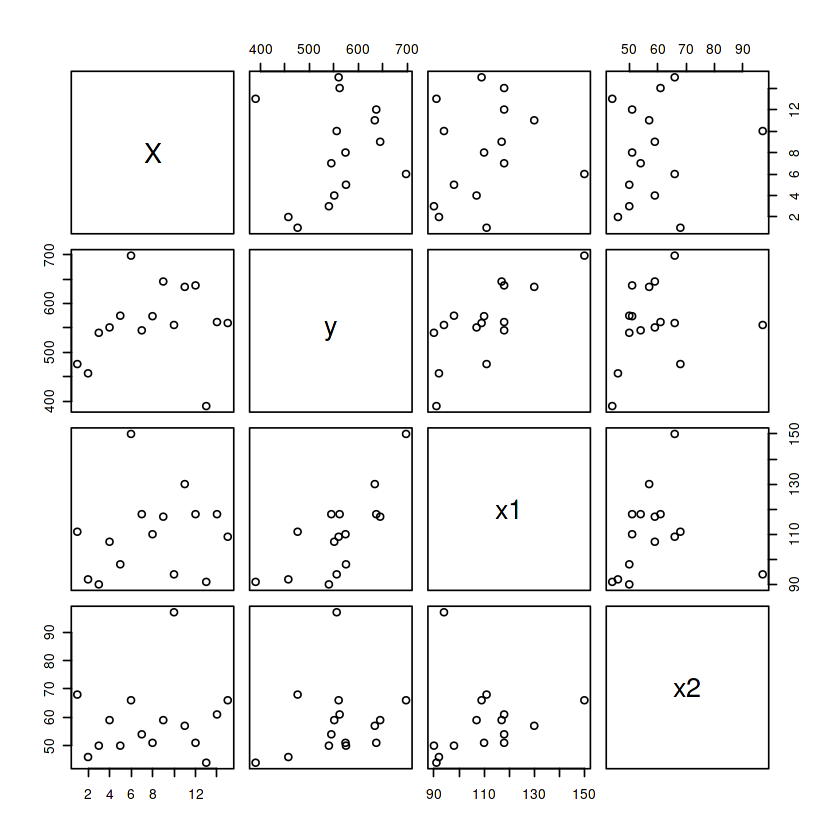

In [39]:
#a
plot(soap)

In [40]:
#b
m2=lm(y~.,data=soap)

In [41]:
S2=summary(m2)
S2


Call:
lm(formula = y ~ ., data = soap)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.961 -28.148   3.474  37.640  65.897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 123.6265   118.2639   1.045   0.3183   
X             0.4048     3.4680   0.117   0.9092   
x1            3.4946     0.9486   3.684   0.0036 **
x2            0.8196     1.1913   0.688   0.5057   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.85 on 11 degrees of freedom
Multiple R-squared:  0.5836,	Adjusted R-squared:  0.4701 
F-statistic:  5.14 on 3 and 11 DF,  p-value: 0.01832


In [42]:
#c
R2=S2$r.squared
R2

Adj_R2=S2$adj.r.squared
Adj_R2

[1] 0.5836459

[1] 0.4700947

In [43]:
#d
CI=confint(m2,level=0.90)
CI


,5 %,95 %
(Intercept),-88.761815,336.014865
X,-5.823298,6.632852
x1,1.791007,5.198214
x2,-1.319891,2.959112


In [44]:
#e
CI=confint(model,level=0.90)
CI


,5 %,95 %
(Intercept),492.97609865,825.21514678
x1,-1.80321587,0.26154920
x2,-5.08132789,-3.31152925
x3,-0.29096476,0.32846476
x4,-0.18769415,0.16626558
x5,-0.16923316,0.28960353
x6,-0.06320479,0.00304436


Q3] Marks.csv

In [45]:
marks=read.csv("../input/data-set-for-prac2/marks.csv")
head(marks)

,X,y,x1,x2
,<int>,<int>,<int>,<int>
1,1,476,111,68
2,2,457,92,46
3,3,540,90,50
4,4,551,107,59
5,5,575,98,50
6,6,698,150,66


In [46]:
#a
m3=lm(y~.,data=marks)

In [51]:
S3=summary(m3)
S3


Call:
lm(formula = y ~ ., data = marks)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.961 -28.148   3.474  37.640  65.897 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 123.6265   118.2639   1.045   0.3183   
X             0.4048     3.4680   0.117   0.9092   
x1            3.4946     0.9486   3.684   0.0036 **
x2            0.8196     1.1913   0.688   0.5057   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56.85 on 11 degrees of freedom
Multiple R-squared:  0.5836,	Adjusted R-squared:  0.4701 
F-statistic:  5.14 on 3 and 11 DF,  p-value: 0.01832


In [53]:
#b
R2=S3$r.squared
R2

Adj_R2=S3$adj.r.squared
Adj_R2

[1] 0.5836459

[1] 0.4700947

In [48]:
#c
R2=S3$r.squared
R2

Adj_R3=S2$adj.r.squared
Adj_R2

[1] 0.5836459

[1] 0.4700947

In [55]:
S4=summary(S3)
S4

              Length Class  Mode   
call           3     -none- call   
terms          3     terms  call   
residuals     15     -none- numeric
coefficients  16     -none- numeric
aliased        4     -none- logical
sigma          1     -none- numeric
df             3     -none- numeric
r.squared      1     -none- numeric
adj.r.squared  1     -none- numeric
fstatistic     3     -none- numeric
cov.unscaled  16     -none- numeric

* For x1 reject H0 B1=0; p<0.05
* For x2 accept H0 B2=0;  p>0.05


As p-value is less than significance level in case of coefficients of x1,we reject the null hypothesis (H01).In case of coefficients of x2, we accept the null hypothesis H02 because the p-value is greater than the significance level.